In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
wine.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


# Data Cleaning

In [4]:
#check for missing values:
wine.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

We can see that the data seems to have a lot of missing values.

In [5]:
#check for duplicates:
duplicates = wine[wine.duplicated('description',keep=False)].sort_values('description')

In [6]:
duplicates.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,72181,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
73731,73731,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie


In [7]:
print('Number of duplicates:',len(duplicates))

Number of duplicates: 20026


Since there are a lot of duplicates in the data, we would have to remove all of them.

In [8]:
wine2 = wine.drop_duplicates('description')

In [9]:
len(wine2)

119955

In [10]:
#check for missing values in wine2:
wine2.isnull().sum()

Unnamed: 0                   0
country                     59
description                  0
designation              34532
points                       0
price                     8388
province                    59
region_1                 19558
region_2                 73195
taster_name              24912
taster_twitter_handle    29441
title                        0
variety                      1
winery                       0
dtype: int64

# Handling Missing Values

Country: 
For missing countries, I would drop all the data since there are not a lot of them as well and I want to fill in the prices based on countries available.

Price:
Since the wine with missing prices have its countries name, we would use the average prices of wine in that country to fill in the missing values.

Region1:
For region1 that are missing, I would change it to unknown.

Region2:
Since about half of our data are missing for region2, we would exclude the column region2 from our analysis.

Taster name:
We would exclude this from our analysis since we do not really want to know how accurate a taster is, but rather based on the wine's description, what is the wine variety. 

Taster tweeter handle:
This is also irrelevant to our analysis so we would not be including this column in our analysis.

Variety: Since there is only 1 row that has missing variety, we will just drop it




In [11]:
#drop missing country values:
wine2 = wine2[pd.notnull(wine2['country'])]

In [12]:
#check for the dataframe with missing prices:
missing_prices = wine2[pd.isnull(wine2['price'])]
missing_prices.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte


In [13]:
#get the average price of wine per country based on non-missing values:
non_missing_price = wine2[pd.notnull(wine2['price'])]
mean_price_before = non_missing_price.groupby('country').agg({'price':'mean'}).reset_index()
#create key:country, value:average price pair
mean_price_dict = mean_price_before.set_index('country')['price'].to_dict()

In [14]:
wine2.groupby('country').agg({'country':'count'})

,country
country,
Argentina,3543
Armenia,2
Australia,2197
Austria,3033
Bosnia and Herzegovina,2
Brazil,49
Bulgaria,132
Canada,226
Chile,4184


Since Egypt seems to be missing from our list of countries, we would exclude Egypt from Analysis, given that there is only one datapoint from Egypt.

In [15]:
wine2_new = wine2[wine2['country']!='Egypt']

In [16]:
for i in wine2_new.index:
    if pd.isnull(wine2_new['price'][i]):
        wine2_new['price'][i] = mean_price_dict[wine2_new['country'][i]]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
wine2_new.isnull().sum()

Unnamed: 0                   0
country                      0
description                  0
designation              34522
points                       0
price                        0
province                     0
region_1                 19498
region_2                 73135
taster_name              24912
taster_twitter_handle    29441
title                        0
variety                      1
winery                       0
dtype: int64

In [18]:
#Let's fill in the missing values for Region1:
wine2_new['region_1'] = wine2_new['region_1'].fillna('unknown')

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
df = wine2_new[pd.notnull(wine2_new['variety'])]
df = df.drop(['designation','region_2','taster_name','taster_twitter_handle'],axis=1)

In [31]:
df.isnull().sum()

Unnamed: 0     0
country        0
description    0
points         0
price          0
province       0
region_1       0
title          0
variety        0
winery         0
dtype: int64

Since we would not be using designation, region_2, taster_name, and taster_twitter_handle as part of our analysis, as we are mainly considering the wine's description as part of the wine variety's prediction, we now have no missing values.

# Exploratory Data Analysis (EDA)

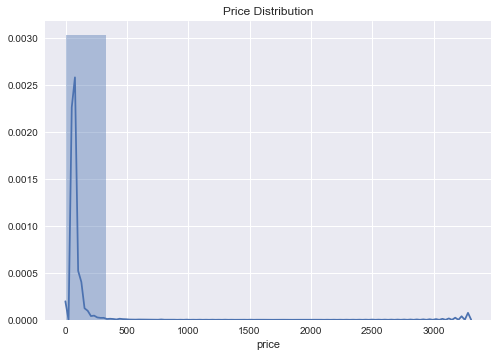

In [36]:
#Figure out the price distribution of wine
sns.distplot(df['price'],bins = 10)
plt.title('Price Distribution')
plt.show()

We can see that the graph above is very right skewed, and is highly centralized around the 0-250USD range. Let's try taking a log of Price.

In [39]:
df['log_price'] = np.log(df['price'])
df.head(2)

,Unnamed: 0,country,description,points,price,province,region_1,title,variety,winery,log_price
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,39.928027,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,3.687079
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2.708050


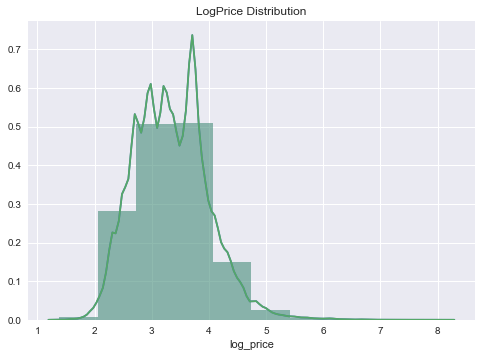

In [41]:
#LogPrice Distribution:
sns.distplot(df['log_price'],bins=10)
plt.title('LogPrice Distribution')
plt.show()

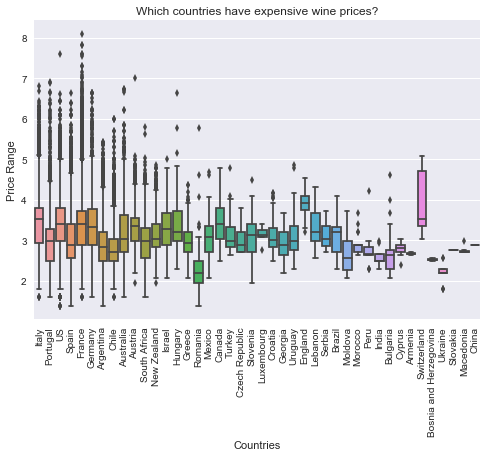

In [60]:
#LogPrice Distribution across countries:
sns.boxplot(x='country',y='log_price',data=df)
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('Price Range')
plt.title('Which countries have expensive wine prices?')
plt.show()

From the graph above, we can see that China, Macedonia, Slovakia, Bosnia and Herzgovina, and Switzerland do not have a large range of wine prices.

The country with highest mean price of wine is England, followed by Italy, and Switzerland. 

Countries with lower average price of wine include Ukraine, Romania, India, and Moldova.




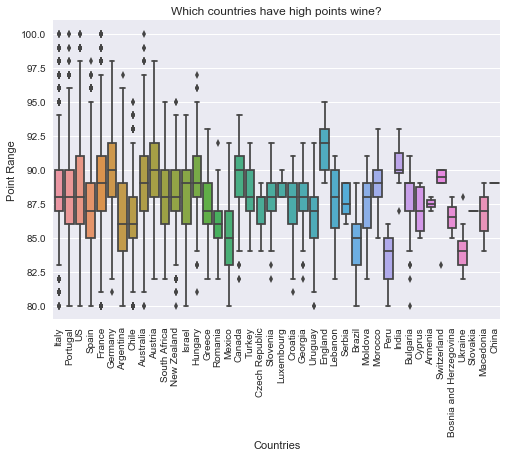

In [59]:
#Figure out the points of wine across different countries:
sns.boxplot(x='country',y='points',data=df)
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('Point Range')
plt.title('Which countries have high points wine?')
plt.show()

England's wines seem to have higher points in comparison to other countries and India as well. What is interesting here is India's wines do not seem to be on the high-end of the price range but England's wines seem to be on the high-end of the price range. This might mean that Price is not correlated with points. I will evaluate this further below.

In [81]:
#Best wine producing countries based on counts (point system):
df_bestwine = df[df['points']>=90]
country_bestwine = df_bestwine.groupby('country').agg({'points':'count'}).reset_index()

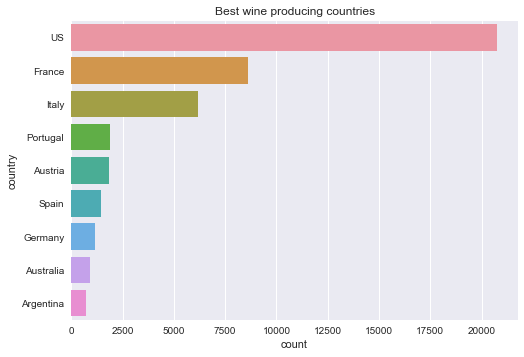

In [84]:
country_bestwine = country_bestwine.sort_values('points',ascending=False).iloc[:9,:]
sns.barplot(x='points',y='country',data=country_bestwine)
plt.xlabel('count')
plt.ylabel('country')
plt.title('Best wine producing countries')
plt.show()

We can see that the top 3 countries that produce high-quality wines with points above 90 are: US, France,and Italy. 

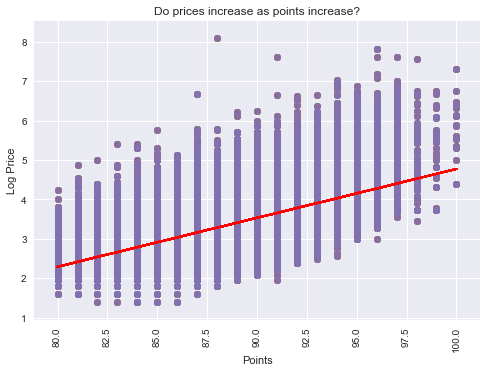

In [58]:
#Relationship between price and points of wine:
sns.regplot(x=df['points'],y=df['log_price'],scatter=True,fit_reg=False)
plt.xlabel('Points')
plt.xticks(rotation=90)
plt.ylabel('Log Price')
plt.title('Do prices increase as points increase?')
p1 = np.polyfit(df['points'],df['log_price'],1)
plt.plot(df['points'],np.polyval(p1,df['points']),'r--')
plt.show()

The plot above shows that price increases as points increases, as shown on the linear relationship above.

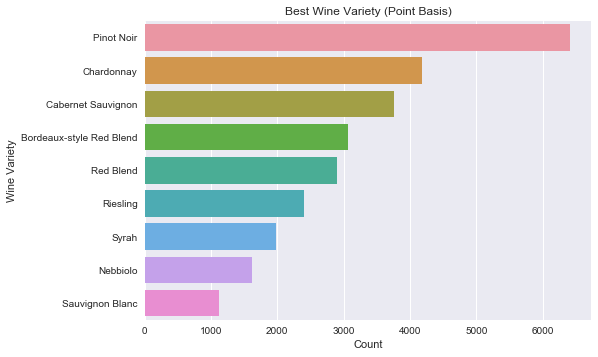

In [94]:
#Which wine variety have highest points? #based on count
variety_bestwine = df_bestwine.groupby('variety').agg({'points':'count','price':'mean'}).reset_index()
variety_bestwine2 = variety_bestwine.sort_values('points',ascending=False).iloc[:9,:]
sns.barplot(x='points',y='variety',data=variety_bestwine2)
plt.xlabel('Count')
plt.ylabel('Wine Variety')
plt.title('Best Wine Variety (Point Basis)')
plt.show()

The wine variety with highest quality based on points is Pinot Noir, followed by: Chardonnay, Cabernet Sauvignon, Bordeaux-style Red Blend, etc.

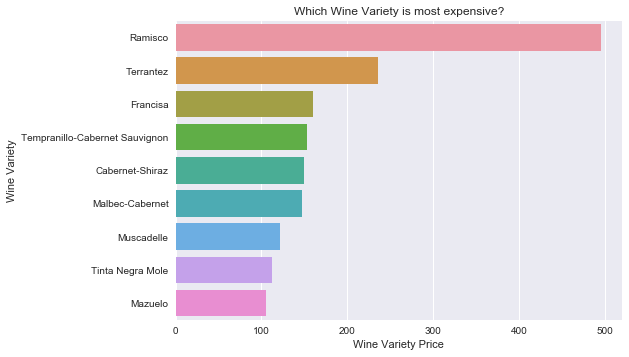

In [95]:
#Variety and Price
variety_price = variety_bestwine.sort_values('price',ascending=False).iloc[:9,:]
sns.barplot(x='price',y='variety',data=variety_price)
plt.xlabel('Wine Variety Price')
plt.ylabel('Wine Variety')
plt.title('Which Wine Variety is most expensive?')
plt.show()

This is very interesting because most of the wines that are considered really good based on points do not make it into the most expensive wines list. 

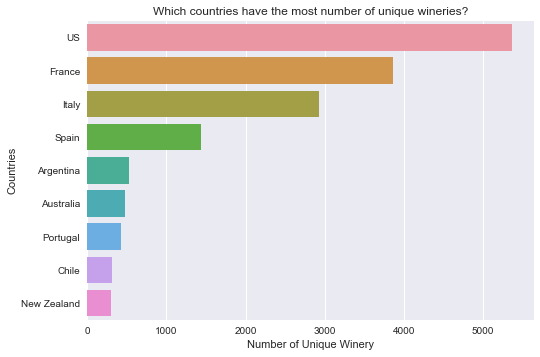

In [104]:
#Which countries have the most number of winery?
winery_count = df.groupby('country')['winery'].nunique().reset_index()
winery_count = winery_count.sort_values('winery',ascending=False).iloc[:9,:]
sns.barplot(x='winery',y='country',data=winery_count)
plt.xlabel('Number of Unique Winery')
plt.ylabel('Countries')
plt.title('Which countries have the most number of unique wineries?')
plt.show()

Turns out that US has the most number of unique wineries, followed by France, Italy, and Spain.

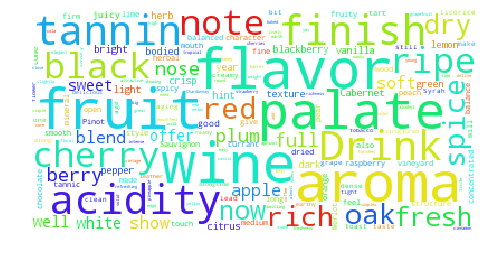

In [111]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(background_color='white', stopwords=STOPWORDS, max_font_size= 50)
wc.generate(' '.join(str(s) for s in df.description.values))
plt.axis('off')
plt.imshow(wc)
plt.show()

Turns out that the most frequent words that a sommelier use in describing wines they taste are: flavor, fruit, wine, acidity,palate, and aroma.